**<span style="font-size:40px; color:black;">Techcareer Mezuniyet Projesi</span>**

## Proje Gereksinimleri
### 1. Veri Keşfetme (EDA)
   - 1.1. Keşifçi Analiz (EDA)
   - 1.2. Gerekli Görsel Analizler
   - 1.3. Cevaplanması Gereken Sorular
### 2. Veri Temizleme ve Ön İşleme
   - 2.1. Eksik Değerlerin Ele Alınması
   - 2.2. Kategorik Değişkenlerin Kodlanması
   - 2.3. Özellik Ölçekleme
### 3. Özellik Mühendisliği
   - 3.1. Alan bilgisine dayalı olarak yeni özellikler
   - 3.2. Yüksek korelasyona sahip özellikleri (korelasyon katsayısı > 0.9) belirleyip kaldırın.
### 4. Model Uygulaması
   - 4.1. Lojistik Regresyon
   - 4.2. KNN Sınıflandırma
### 5. Model Değerlendirmesi 
   - 5.1. Her iki modeli aşağıdaki metriklerle değerlendirin.
   - 5.2. Lojistik Regresyon ve KNN sonuçlarını karşılaştırın. Hangi model daha iyi performans gösteriyor? Neden?

In [1]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Veri setini notebook içerisine dahil edelim.

df = pd.read_csv("final_data.csv")

**<span style="font-size:33px; color:black;">1. Veri Keşfetme(EDA)</span>**


# 1.1. Keşifçi Analiz (EDA)

In [3]:
# verimizin ilk 10 satırını çağıralım.

df.head(10)

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,4,53,male,2,free,little,little,4870,24,car,0
5,5,5,35,male,1,free,NaN,NaN,9055,36,education,1
6,6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,1
7,7,7,35,male,3,rent,little,moderate,6948,36,car,1
8,8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,1
9,9,9,28,male,3,own,little,moderate,5234,30,car,0


**<span style="font-size:18px; color:black;">Verimizin değişkenleri hakkında detaylı bilgi edinelim ve değişkenlerimizi daha yakından tanıyalım.</span>**

- #### Unnamed: 0.1 : Satır indekslerini içerir. ( Veriden silinmesi gerekir.)
- #### Unnamed: 0 :  Satır indekslerini içerir. ( Veriden silinmesi gerekir.)
- #### Age : Kişinin yaşı
- #### Sex : Kişinin cinsiyeti (M : Erkek, F: Kadın)
- #### Job : Kişinin meslek kategorisi (Sayısal değerler ile kodlanmış:  0, 1, 2, 3 olarak)
- #### Housing : Kişinin konut durumu ( free : ücretsiz, rent: kiracı, own: kendi evi)
- #### Saving accounts : Kişinin tasarruf hesabındaki birikim durumu ("little", "moderate", "rich", "quite rich")(birikim)
- #### Checking account : Kişinin vadesiz hesabındaki bakiye durumu ("little", "moderate", "rich")(bakiye durumu)
- #### Credit amount : Kişinin kredi talep ettiği miktar ($ cinsinden)
- #### Duration : Kredi süresi (ay cinsinden)
- #### Purpose :  Kredi alma amacı ('radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others')
- #### Risk : Risk durumu (1 = Risksiz (krediyi geri öder)("Good Risk") , 0 = Riskli (krediyi geri ödemez.)("Bad Risk") ile kodlanmış).


- ### Hedef(target) değişken --> Risk 

**<span style="font-size:18px; color:black;">Veride ilk göze çarpan veriye doğrudan etkisi bulunmayan değişkenleri verimizden düşürelim.</span>**

In [4]:
# Unnamed: 0.1, Unnamed: 0 değişkenlerinin veriye doğrudan etkisi bulunmadığı için siliyoruz.

df = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [5]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1


In [6]:
# tüm değişkenlerin harflerini küçük harfe çevirelim. 

df.columns = df.columns.str.lower()

In [7]:
# tüm değişkenlerin isimlerinde arada boşluk olanları _ ile değiştir.

df.columns = df.columns.str.replace(" ", "_") 

In [8]:
df

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [9]:
# Verimizin tipine bakalım

type(df)

pandas.core.frame.DataFrame

In [10]:
# Verimizde kaç satır kaç sütun bulunuyor ona bakalım

df.shape

(1000, 10)

In [11]:
# Verimiz hakkında detaylı bilgi edinelim

df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


### df.info() ile edinilen bilgiler
- Veri tipinin DataFrame olduğunu gözlemliyoruz.
- Verimizde toplamda 1000 gözlem bulunuyor. 
- 5 tane numeric(int64)  tipte değişkenimiz var.
- 5 tane kategorik(object) tipte değişkenimiz var.
- saving_accounts ve checking_account değişkenlerinde NaN olduğunu gözlemliyoruz. Onun haricindeki diğer değişkenlerde eksik değer bulunmuyor.

In [12]:
df.describe()

,age,job,credit_amount,duration,risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.700000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,1.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


**<span style="font-size:18px; color:black;">Verinin setindeki sayısal sütunlara ilişkin temel istatistiksel özetleri yorumlayalım.</span>**

- count: Her bir sütundaki gözlem sayısını gösterir. Bütün sütunlarda 1000 gözlem var, yani eksik veri bulunmuyor.
- mean: Ortalama değer. Her sütunun ortalama değerini verir.
- std: Standart sapma. Verilerin ortalamadan ne kadar sapma gösterdiğini ifade eder.
- min ve max: Minimum ve maksimum değerler.
- Yüzdelikler (25%, 50%, 75%):
  - 25% (Q1): Verilerin %25'inin bu değerin altında olduğu eşik (1. çeyrek).
  - 50% (Q2, Medyan): Verilerin ortanca değeri.
  - 75% (Q3): Verilerin %75'inin bu değerin altında olduğu eşik (3. çeyrek)
  
#### Değişken Bazlı Yorumlar
**1. age (Yaş)**
- Ortalama yaş(mean): 35.54.
- Yaşlar 19(min) ile 75(max) arasında değişiyor.
- 50% (medyan): 33 (yaşların yarısı 33'ün altında, yarısı üstünde).
- Standart sapma: 11.37 (yaşlar ortalamadan ±11 yıl sapabiliyor).

**2. job (İş Durumu)**
- Ortalama(mean): 1.90, maksimum değer: 3.
- Çeyrek değerlere bakıldığında çoğu bireyin iş durumu 2 civarında.

**3. credit_amount (Kredi Miktarı($))**
- Ortalama(mean): 3271.26, standart sapma: 2822.73.
- Kredi miktarı oldukça değişken; minimum(min) 250, maksimum(max) 18424.
- 50% (medyan): 2319.5; çoğu kişi bu tutarın çevresinde kredi almış.
- 75% çeyrek değeri: 3972.25; bu değerin üzerindeki krediler yüksek kabul edilebilir.

**4. duration (Kredi Süresi)**
- Ortalama(mean): 20.90 ay.
- Süreler 4(min) aydan 72(max) aya kadar değişiyor.
- 50% (medyan): 18 ay, çoğu kişi 18 ay civarında kredi çekiyor.
- 75%: 24 ay, uzun vadeli krediler 2 yılın üzerinde.

**5. risk (Risk Seviyesi)**
- Ortalama(mean): 0.70, bu veri setindeki bireylerin %70'i yüksek riskli.
- Minimum: 0, maksimum: 1 (binary sınıflandırma; 0 düşük risk, 1 yüksek risk).





In [13]:
df.describe(include="object")

,sex,housing,saving_accounts,checking_account,purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


**<span style="font-size:18px; color:black;">Verinin setindeki kategorik sütunlara ilişkin temel istatistiksel özetleri yorumlayalım.</span>**

**1. Değişkenler:**
- sex : Kişinin cinsiyeti (M : Erkek, F: Kadın)
- housing : Kişinin konut durumu ( free : ücretsiz, rent: kiracı, own: kendi evi)
- saving_accounts: Kişinin tasarruf hesabındaki birikim durumu ("little", "moderate", "rich", "quite rich")(birikim)
- checking_account: Kişinin vadesiz hesabındaki bakiye durumu ("little", "moderate", "rich")(bakiye durumu)
- purpose: Kredi alma amacı ("radio/TV", "education", "car", "business")

<br>

**2. Tablodaki Satırların Açıklaması:**
- **count**: Her değişken için toplam geçerli (eksik olmayan) gözlem sayısını gösterir.

    - Örneğin:
    - sex ve housing: 1000 gözlemde eksik değer yok.
    - saving_accounts: 817 geçerli değer var, yani 183 eksik.
    - checking_account: 606 geçerli değer var, 394 eksik.

- **unique**: Her değişkende kaç farklı kategori olduğunu gösterir.

    - Örneğin:
    - sex: 2 farklı kategori var ("male" , "female").
    - housing: 3 farklı kategori ("own", "rent", "free").
    - saving_accounts: 4 farklı kategori ("little", "moderate", "rich", "quite rich")
    - checking_account: 3 farklı kategori ("little", "moderate", "rich")
    - purpose: 8 farklı kredi amacı. ('radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others')

- **top** : Her değişkende en sık rastlanan (mod) kategoriyi belirtir.

    - Örneğin:
    - sex: En sık rastlanan değer "male".
    - housing: En sık rastlanan değer "own" (kendi evi).
    - saving_accounts ve checking_account: "little" en sık görülen değer.
    - purpose: "car" en sık rastlanan kredi amacı.

- **freq**: "top" kategorisinin kaç kez tekrarlandığını belirtir.
    
    - Örneğin:
    - sex: "male" 690 kez tekrar edilmiş.
    - housing: "own" 713 kez tekrar edilmiş.
    - saving_accounts: "little" 603 kez tekrar edilmiş.
    - checking_account: "little" 274 kez tekrar edilmiş.
    - purpose: "car" 337 kez tekrar edilmiş.

**3. Genel Yorumlar:**
- Eksik Değerler: saving_accounts ve checking_account değişkenlerinde eksik veri oranı oldukça yüksek. Eksik verilerin nasıl işleneceği analizde kritik olabilir.

- Dengesizlik: Bazı değişkenlerde belirli kategoriler diğerlerinden çok daha sık görünüyor (örneğin, "male" ve "own").

- Amaca Göre Dağılım: Kredilerin amacı geniş bir yelpazeye yayılmış, ancak "car" kredisi en sık.

- Bu bilgiler, veri temizleme, görselleştirme ve modelleme aşamaları için rehberlik edebilir. Eksik veri stratejisi belirlenmeli ve kategorilerin dengesizliği dikkate alınmalıdır.



In [14]:
df

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


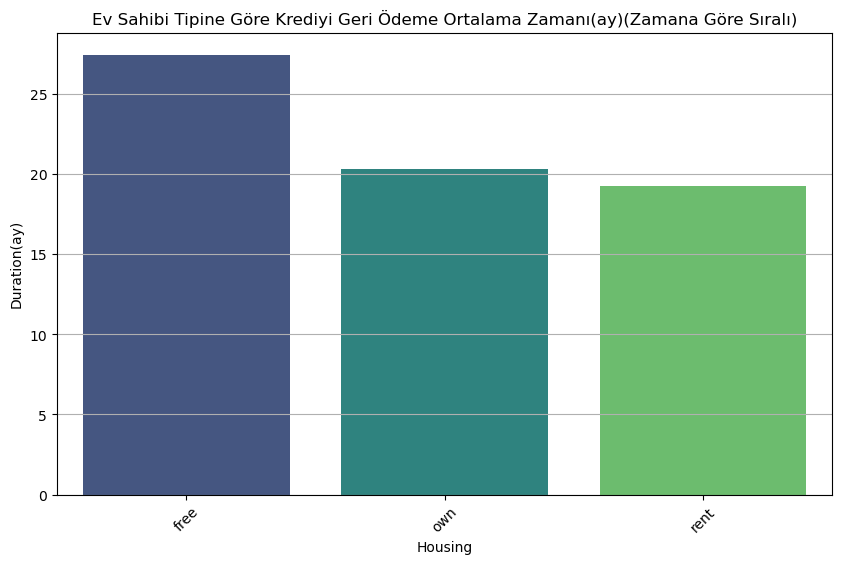

In [15]:
# Ev sahibi Tipine göre olan kişiler krediyi ortalama kaç ayda ödemişler?

avg_duration_per_housing = df.groupby('housing')['duration'].mean().reset_index()
avg_duration_per_housing = avg_duration_per_housing.sort_values(by='duration', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='housing', y='duration', data=avg_duration_per_housing, palette='viridis', order=avg_duration_per_housing['housing'])
plt.title('Ev Sahibi Tipine Göre Krediyi Geri Ödeme Ortalama Zamanı(ay)(Zamana Göre Sıralı)' )
plt.xticks(rotation=45)
plt.xlabel('Housing')
plt.ylabel('Duration(ay)')
plt.grid(axis='y')
plt.show()

**Grafik Yorum:**
- Ev sahibi olan ve kirada oturan kişilerin krediyi geri ödeme süresinin diğer kategorilere göre daha kısa sürede ödediği görülmektedir.
- free kategorisinde olan kişilerin en geç sürede geri ödeme yaptığı yukarıdaki tablodan çıkarılmaktadır.

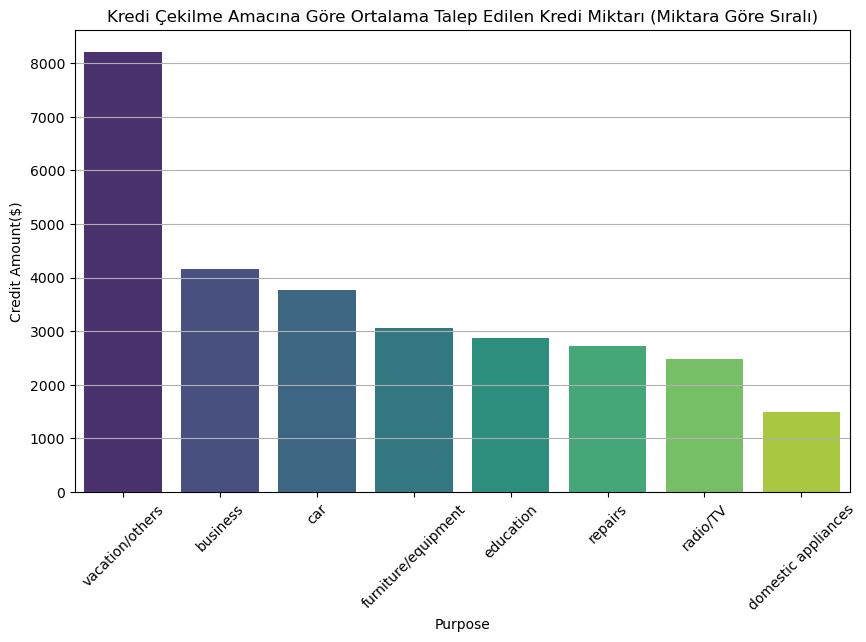

In [16]:
# Kredi çekilme amacına göre ortalama talep edilen kredi miktarı nedir?

avg_duration_per_housing = df.groupby('purpose')['credit_amount'].mean().reset_index()
avg_duration_per_housing = avg_duration_per_housing.sort_values(by='credit_amount', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='purpose', y='credit_amount', data=avg_duration_per_housing, palette='viridis', order=avg_duration_per_housing['purpose'])
plt.title('Kredi Çekilme Amacına Göre Ortalama Talep Edilen Kredi Miktarı (Miktara Göre Sıralı)' )
plt.xticks(rotation=45)
plt.xlabel('Purpose')
plt.ylabel('Credit Amount($)')
plt.grid(axis='y')
plt.show()

**Grafik Yorum:**
- En çok talep edilen kredi miktarı vacation/others(tatil/diğerleri) olduğu görülmektedir.
- En az ise domestic appliances (ev aletleri) için talep edilmiştir.

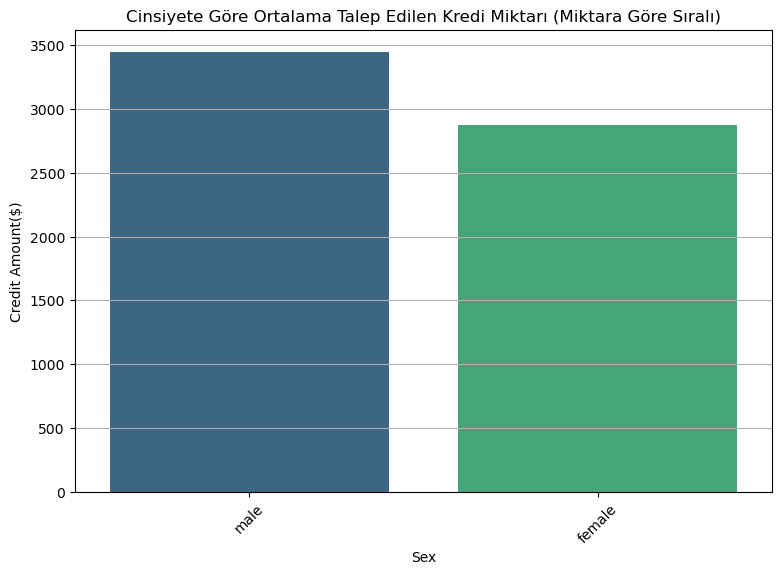

In [17]:
# Cinsiyete göre ortalama talep edilen kredi miktarı nedir?

avg_duration_per_housing = df.groupby('sex')['credit_amount'].mean().reset_index()
avg_duration_per_housing = avg_duration_per_housing.sort_values(by='credit_amount', ascending=False)

plt.figure(figsize=(9, 6))

sns.barplot(x='sex', y='credit_amount', data=avg_duration_per_housing, palette='viridis', order=avg_duration_per_housing['sex'])
plt.title('Cinsiyete Göre Ortalama Talep Edilen Kredi Miktarı (Miktara Göre Sıralı)' )
plt.xticks(rotation=45)
plt.xlabel('Sex')
plt.ylabel('Credit Amount($)')
plt.grid(axis='y')
plt.show()

**Grafik Yorum:**
- Arada çok fazla fark olmamasıyla birlikte erkeklerin kadınlardan daha fazla kredi miktarı talep ettiği görülmektedir.

# 1.2. Gerekli Görsel Analizler

**Görev 1.2.1**
- Sayısal değişkenlerin dağılımı ("Age", "Credit amount", "Duration" için histogram veya kutu grafikleri).

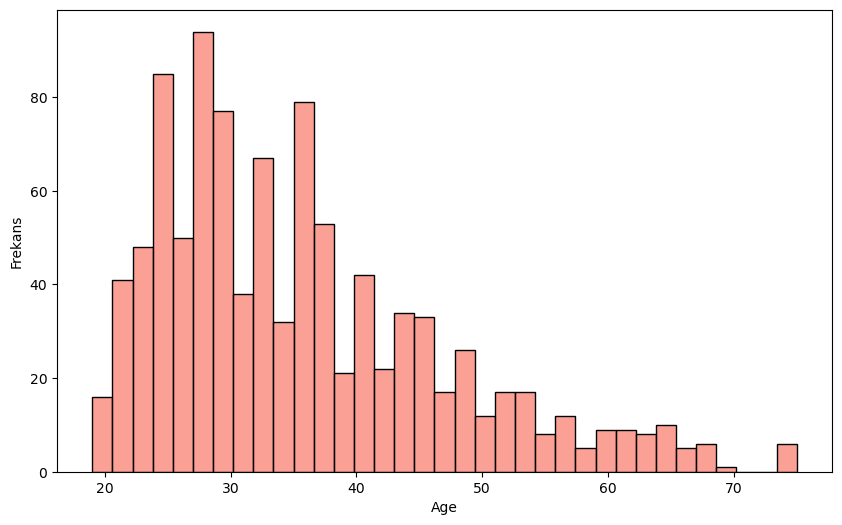

In [18]:
# yaş dağılımına bakalım.


plt.figure(figsize=(10,6))
sns.histplot(df["age"], bins=35, color='salmon', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frekans")
plt.show()

### age grafik yorumu


**.describe() ile elde edilen sonuçlar:**

**age (Yaş)**
- Ortalama yaş(mean): 35.54.
- Yaşlar 19(min) ile 75(max) arasında değişiyor.
- 50% (medyan): 33 (yaşların yarısı 33'ün altında, yarısı üstünde).
- Standart sapma: 11.37 (yaşlar ortalamadan ±11 yıl sapabiliyor).


#### Yukarıda describe ile edinmiş olduğumuz bilgilerden de yola çıkarak grafik hakkında şu yorumu yapabiliriz:
- 25-37 yaş aralığında dağılımda yoğunluk olduğunu gözlemliyoruz. Bu durum kredi çekmek için bu yaş aralığındaki kişilerin daha fazla olduğunu gösteriyor.
- Buna göre kredi çekmek için başvuran kişilerin daha çok genç yaşta insanların yoğunlukta olan bir grup olduğunu söyleyebiliriz.
 

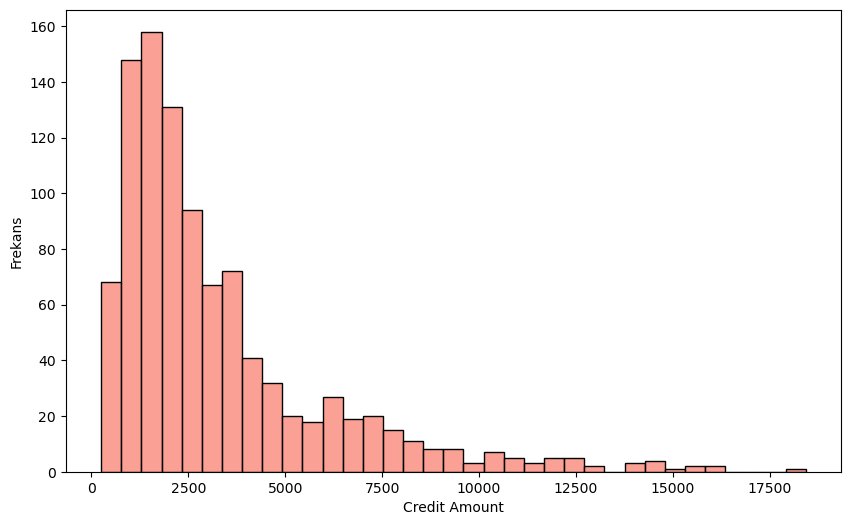

In [19]:
# credit_amount dağılımına bakalım

plt.figure(figsize=(10,6))
sns.histplot(df["credit_amount"], bins=35, color='salmon', edgecolor='black')
plt.xlabel("Credit Amount") 
plt.ylabel("Frekans")
plt.show()

### credit_amount grafik yorumu

**.describe() ile elde edilen sonuçlar:**

**credit_amount (Kredi Miktarı($))**
- Ortalama(mean): 3271.26, standart sapma: 2822.73.
- Kredi miktarı oldukça değişken; minimum(min) 250, maksimum(max) 18424.
- 50% (medyan): 2319.5; çoğu kişi bu tutarın çevresinde kredi almış.
- 75% çeyrek değeri: 3972.25; bu değerin üzerindeki krediler yüksek kabul edilebilir.

#### Yukarıda describe ile edinmiş olduğumuz bilgilerden de yola çıkarak grafik hakkında şu yorumu yapabiliriz:

- Çekilmek istenen kredi miktarının yoğunluğu daha çok 1000-3000 $ aralığında kişilerce daha yoğun olarak talep edildiğini görmekteyiz.
- describe ile bulunan ortalama ile karşılaştırınca şu yorum ortaya çıkıyor: Daha yüksek miktarda kredi çeken kişiler dolayısıyla ortalama yukarıya çıkmıştır. Bu sebeple tablo ve istatistiksel dağılım biraz birbirinden farklıdır.

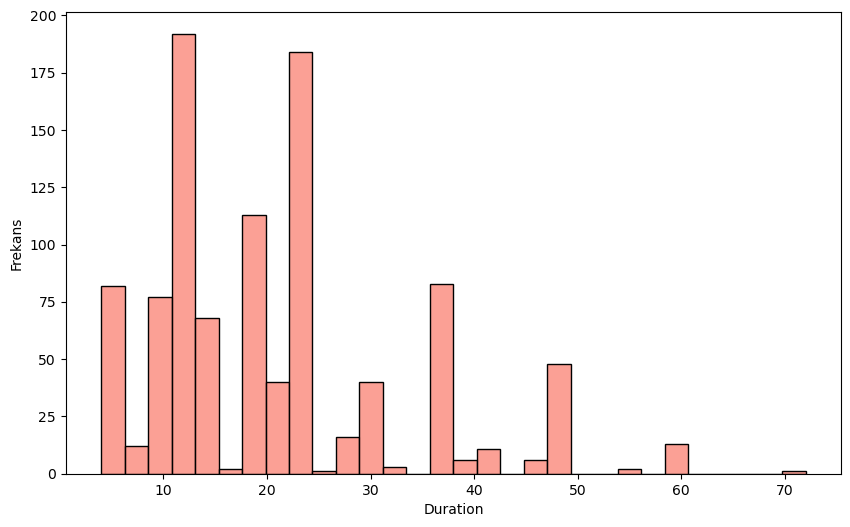

In [20]:
# duration dağılımına bakalım

plt.figure(figsize=(10,6))
sns.histplot(df["duration"], bins=30, color='salmon', edgecolor='black')
plt.xlabel("Duration")
plt.ylabel("Frekans")
plt.show()

### duration grafik yorumu


**.describe() ile elde edilen sonuçlar:**

**duration (Kredi Süresi(ay))**
- Ortalama(mean): 20.90 ay.
- Süreler 4(min) aydan 72(max) aya kadar değişiyor.
- 50% (medyan): 18 ay, çoğu kişi 18 ay civarında kredi çekiyor.
- 75%: 24 ay, uzun vadeli krediler 2 yılın üzerinde.


#### Yukarıda describe ile edinmiş olduğumuz bilgilerden de yola çıkarak grafik hakkında şu yorumu yapabiliriz:

- Çekilmek istenen kredi süresinin yoğunluğu daha çok 12-23 ay aralığında daha yoğun olarak talep edildiğini görmekteyiz.
- describe ile bulunan ortalama ile karşılaştırınca şu yorum ortaya çıkıyor: Daha uzun kredi süresi talep eden kişiler dolayısıyla ortalama yukarıya çıkmıştır. Bu sebeple tablo ve istatistiksel dağılım biraz birbirinden farklıdır.


**Görev 1.2.2**
- Kategorik değişkenlerin sayımları ("Sex", "Housing", "Purpose" için çubuk grafikler)

In [21]:
df["sex"].value_counts()

male      690
female    310
Name: sex, dtype: int64

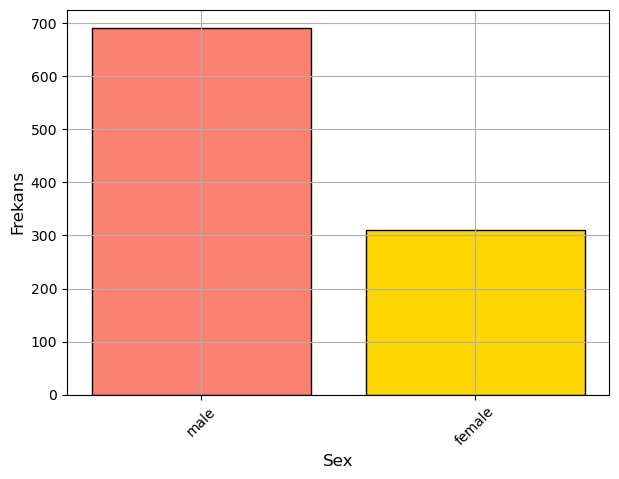

In [22]:
# sex değişkeni dağılımına bakalım

plt.figure(figsize = (7,5))
counts = df["sex"].value_counts()                           # Kategorik değişkenlerin sayımı
plt.bar(counts.index, counts.values, color=['salmon', 'gold'], edgecolor='black')
plt.xlabel('Sex', fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()

### sex grafik yorumu

**.describe(include='object') ile elde edilen sonuçlar:**

- sex : 1000 gözlemde eksik değer yok.
- sex: 2 farklı kategori var ("male" , "female").
- En sık rastlanan değer "male". 690 kez tekrar edilmiş.

**Yukarıda describe ile edinmiş olduğumuz bilgilerden de yola çıkarak grafik hakkında şu yorumu yapabiliriz:**
- Erkek ("male") kategorisi, grafikte daha yüksek bir frekansa sahiptir. Bu, veri setindeki erkeklerin sayısının kadınlardan daha fazla olduğunu gösterir.
- Erkeklerin sayısı yaklaşık 700 civarındayken, kadınların sayısı yaklaşık 300 civarında görünmektedir. Bu, erkeklerin kadınlara oranla veri setinde yaklaşık 2 kat daha fazla yer aldığını gösterir.

**NOTE:**
- Dengesiz Dağılım:
    - Veri setindeki erkeklerin sayısının kadınlardan çok daha fazla olması, dengesiz bir dağılıma işaret ediyor. Bu durum, modelleme sırasında dikkate alınmalıdır. Örneğin:
    - Eğer verinin çoğu erkeklerden oluşuyorsa, model cinsiyet farkını doğru şekilde değerlendiremeyebilir. Dengeli bir veri seti için kadın ve erkek grupları arasında eşit veya daha dengeli bir örneklem sağlanabilir.

**NOTE:**
- Dengesiz dağılım olması sebebiyle ileriki adımlarda kurulan modeller karşılaştırılırken Accuracy değeri değil de F1-Score dikkate alınarak değerlendirmeler yapılacaktır. 
-  F1-Score, özellikle dengesiz veri setlerinde modelin azınlık sınıfına ne kadar duyarlı ve doğru olduğunu ölçerken daha anlamlı bir metrik sunar. Accuracy, dengesiz veri setlerinde yanıltıcı olabileceğinden, F1-Score genellikle daha doğru ve güvenilir bir değerlendirme sağlar.

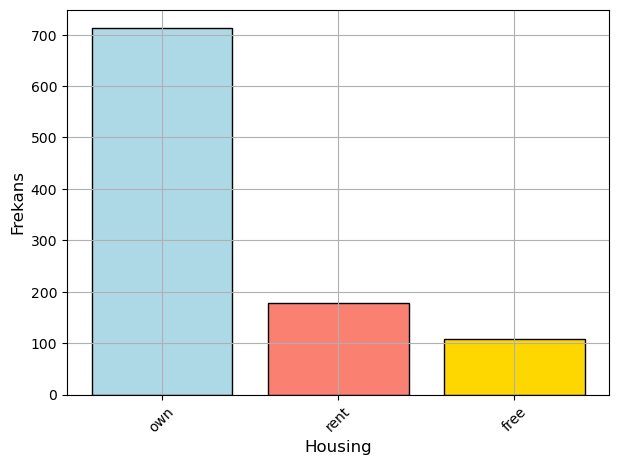

In [23]:
# housing değişkeni dağılımına bakalım

plt.figure(figsize = (7,5))
counts = df["housing"].value_counts()                           # Kategorik değişkenlerin sayımı
plt.bar(counts.index, counts.values, color=['lightblue', 'salmon', 'gold', 'darkgreen'], edgecolor='black')
plt.xlabel('Housing', fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()

**.describe(include='object') ile elde edilen sonuçlar:**

housing : Kişinin konut durumu ( free : ücretsiz, rent: kiracı, own: kendi evi)
- 1000 gözlemde eksik değer yok.
- 3 farklı kategori ("own", "rent", "free").
- En sık rastlanan değer "own" (kendi evi). "own" 713 kez tekrar edilmiş.

**Yukarıda describe ile edinmiş olduğumuz bilgilerden de yola çıkarak grafik hakkında şu yorumu yapabiliriz:**
- Own (Kendi Evi Olanlar): Bu kategori en yüksek frekansa sahiptir ve yaklaşık 700 kişi bu gruba dahildir. Veri setindeki bireylerin büyük bir kısmı kendi evine sahip.
- Rent (Kirada Oturanlar): İkinci sırada yer almakta ve frekansı yaklaşık 150 civarındadır.
- Free (Ücretsiz Oturanlar): En düşük frekansa sahiptir ve yaklaşık 100 kişi bu gruba dahildir.

**Yorum:**
- Kendi evine sahip olanlar genellikle finansal olarak daha istikrarlı kabul edilebilir, çünkü kira gibi düzenli bir harcamaları olmayabilir. Bu durum risksiz kredi ödeme durumu olarak değerlendirilebilir.
- Kirada oturanlar finansal olarak daha fazla yük altında olabilir, bu da riskli kredi durumlarına yol açabilir.
- Ücretsiz oturanlar, genellikle aile bireyleriyle yaşayanlar veya başka bir şekilde konut giderlerinden muaf olan kişilerdir. Bu durum, maddi durumlarının güçlü veya zayıf olduğunu anlamak için diğer değişkenlerle birlikte incelenmelidir.

**Öneri:**
- Konut Durumu ve Kredi Riski İlişkisini İnceleme: Konut durumuna göre riskli ve risksiz kredi durumlarının dağılımı analiz edilmelidir.

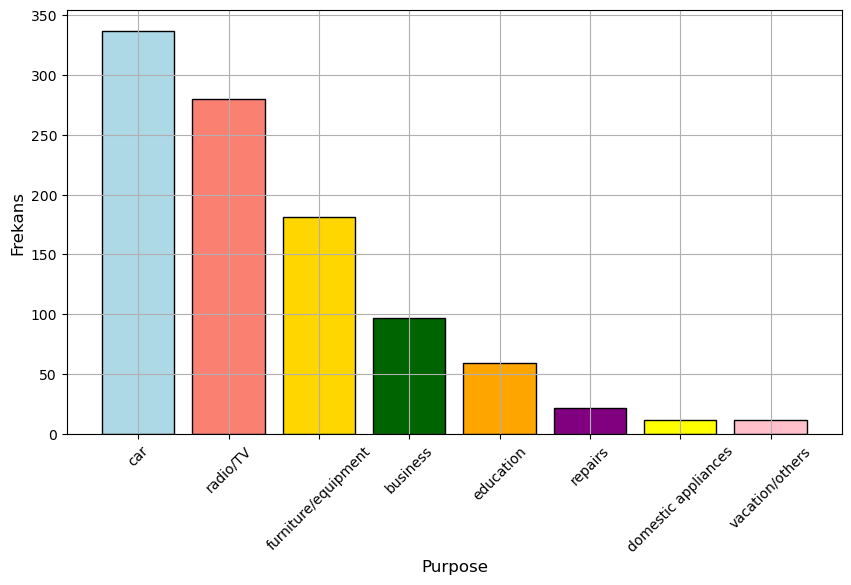

In [24]:
# purpose değişkeninin dağılımı

plt.figure(figsize = (10,5.5))
counts = df["purpose"].value_counts()                           # Kategorik değişkenlerin sayımı
plt.bar(counts.index, counts.values, color=['lightblue', 'salmon', 'gold', 'darkgreen','orange', 'purple', 'yellow','pink'], edgecolor='black')
plt.xlabel('Purpose', fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.show()

**.describe(include='object') ile elde edilen sonuçlar:**
- purpose: 8 farklı kredi alma amacı. ('radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others')
- "car" en sık rastlanan kredi amacı.
- "car" 337 kez tekrar edilmiş.

**Yukarıda describe ile edinmiş olduğumuz bilgilerden de yola çıkarak grafik hakkında şu yorumu yapabiliriz:**
- car (Araç): En sık kredi çekme amacı olarak görülüyor. Yaklaşık 350 kişi kredi çekerken bu amacı belirtmiş. Bu, veri setinde en baskın kategori.
- radio/TV (Radyo/TV): İkinci sırada geliyor ve yaklaşık 270 kişi bu amaçla kredi çekmiş.
- furniture/equipment (Mobilya/Ekipman): Bu amaç, yaklaşık 170 kişi tarafından belirtilmiş.
- business (İş): İş amaçlı kredi çekenlerin sayısı 100 civarında.
- education (Eğitim): Eğitim için kredi çekenlerin sayısı daha düşük (50 civarında).
- repairs (Tamir): Tamir amaçlı kredi çekenlerin sayısı oldukça az (~25).
- domestic appliances (Ev Aletleri) ve vacation/others (Tatiller/Diger): Bu kategoriler en düşük frekanslara sahip, her biri yaklaşık 10-20 kişi.

**NOTE:**
- Veri Dengesizliği:

Veri setinde belirgin bir dengesizlik mevcut. Özellikle "car" ve "radio/TV" kategorileri, toplam veri setinin büyük bir kısmını oluştururken, diğer kategoriler oldukça az temsil edilmiş. Bu, modelleme sırasında bazı kategorilerin etkisinin azalmaması için dikkat edilmesi gereken bir durumdur.


**Görev 1.2.3**
- Sayısal özellikler arasındaki ilişkileri anlamak için korelasyon haritası.

In [25]:
# Korelasyon matrixi yaparak değişkenlerin birbirine olan ilişkisini gözlemleyelim. 

corr_matrix = df.corr(numeric_only=True)

In [26]:
corr_matrix

,age,job,credit_amount,duration,risk
age,1.000000,0.015673,0.032716,-0.036136,0.091127
job,0.015673,1.000000,0.285385,0.210910,-0.032735
credit_amount,0.032716,0.285385,1.000000,0.624984,-0.154739
duration,-0.036136,0.210910,0.624984,1.000000,-0.214927
risk,0.091127,-0.032735,-0.154739,-0.214927,1.000000


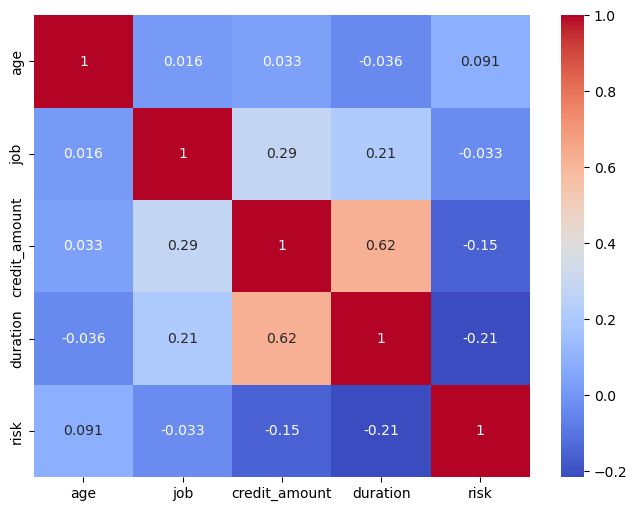

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

### Korelasyon matrixinden yapılan çıkarımlar:

- age ile diğer değişkenler(risk, duration,credit_amount, job) arasında zayıf ilişki var:
  
  age ile diğer değişkenler arasındaki korelasyon çok düşük, neredeyse yok.
  
  (örn: age ile job: +0.016, age ile credit_amount: +0.033).
  
  Bu, yaşın diğer değişkenlerle anlamlı bir ilişki içinde olmadığını gösterebilir.
<br>

- credit_amount ve duration arasında pozitif bir korelasyon (+0.62):

  Bu iki değişken arasında orta derecede güçlü bir ilişki var. 
  
  Örneğin, kredi miktarı (credit_amount) arttıkça, genelde kredi    süresi (duration) de artıyor olabilir.
<br>

- risk ile credit_amount ve duration arasında negatif korelasyon:

  risk ile credit_amount: -0.15
  
  risk ile duration: -0.21
  
  Bu, risk seviyesi arttıkça kredi miktarının ve süresinin azalma eğiliminde olabileceğini gösterebilir. 
<br>

- job ile credit_amount arasında zayıf pozitif ilişki (+0.29):
 
  İş durumu (job) ile kredi miktarı arasında düşük bir pozitif korelasyon var.
  
  Bu durum yetkin bir meslekte olunması dahilinde kredi miktarının artacağına yönelik bir yorum çıkarılabilir.
<br>

- job ve duration arasında zayıf bir pozitif ilişki var gibi görünüyor( +0.21):
  İş durumu ( job) ile kredi süresi (duration) arasında düşük pozitif bir korelasyon var.
  
  Bu durum sahip olunan mesleğe göre verilen kredi süresinin artacağı yönünde bir yorum çıkarılabilir.



# 1.3. Cevaplanması Gereken Sorular

- Soru 1: Veri setinde eksik değerler var mı? Hangi kolonlarda var ve bunlarla nasıl başa çıkılacak?

- Soru 2: "Age", "Credit amount" ve "Duration" değişkenlerinin dağılımları nedir? Aykırı değerler var mı?

- Soru 3: Hedef kolonunda ("iyi" ve "kötü" kredi riski) oran nasıldır? Veri dengesiz mi?

- Soru 4: "İyi" kredi riski kategorisindeki bireylerin ortalama "Credit amount" değeri nedir?

- Soru 5: "Free" (bedava) konut kategorisindeki bireylerin "Saving accounts" değişkeninin dağılımı nasıldır?

- Soru 6: "İyi" ve "kötü" kredi riski grupları arasında "Duration" farklılık gösteriyor mu?

- Soru 7: Yüksek kredi miktarına sahip bireylerin (75. percentile üzerinde) en sık kullandığı 3 "Purpose" kategorisi nedir?

In [28]:
# Soru 1 : Veri setinde eksik değerler var mı? Hangi kolonlarda var ve bunlarla nasıl başa çıkılacak?

df.isnull().sum()         # veri setindeki eksik değerleri bulalım

age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

**Soru 1 için Yorum:**
   - **saving_accounts'da 183** ve **checking_account'da 394** tane eksik değer bulunmaktadır.
   - Eğer sütundaki eksik değer oranı çok yüksekse veya eksik olan verilerin tahmini anlamlı sonuçlar üretmiyorsa, sütunu veya satırı tamamen **silinebilir**.
   - Eksik değerler **doldurulabilir**. 
       - Kategorik değişken ise eksik değerleri sütunda en çok tekrar eden kategorik değerle doldurur. (Mode ile)
       - Sayısal değişken ise eksik değerleri ortalama(Mean) veya Ortanca(Median) ile doldurulabilir.
       
   - Eksik veriler **tahmin edilebilir**.
    
Bu veri seti çok büyük değil, bu yüzden veriyi silmek yerine doldurmak daha iyi olabilir.

In [29]:
# Soru 2: "Age", "Credit amount" ve "Duration" değişkenlerinin dağılımları nedir? Aykırı değerler var mı?

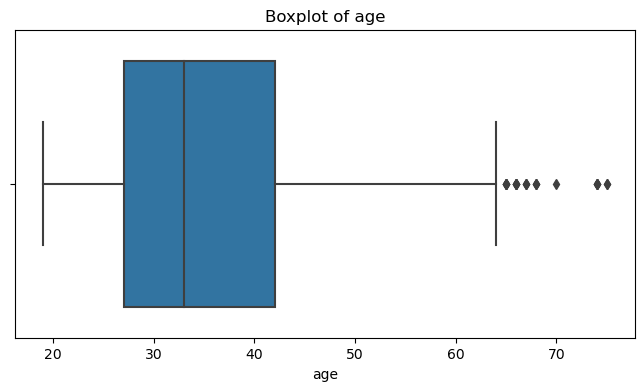

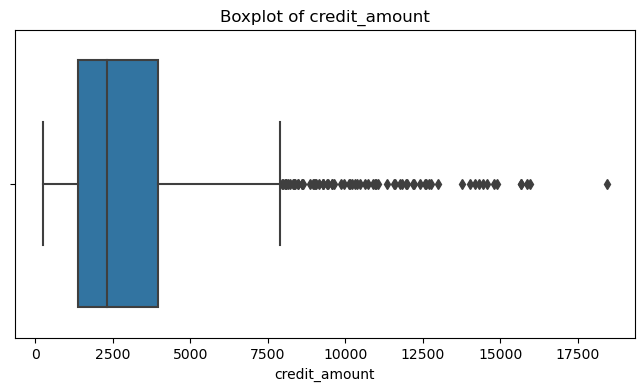

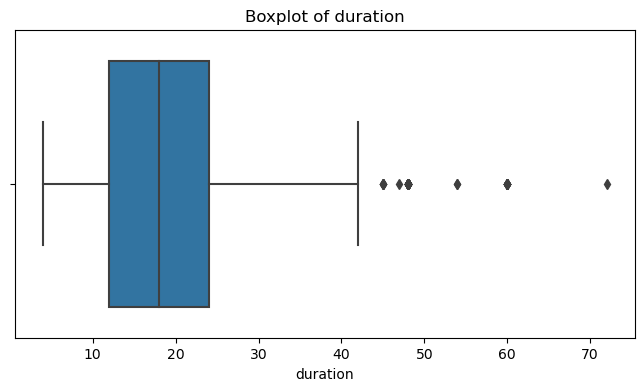

In [30]:
degerler = df[["age", "credit_amount", "duration"]]

for col in degerler.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=degerler, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

**Soru 2 için Yorum:**

### Yorumlayalım:
- age için 20 ve 65 yaş arası normal kabul edilmiş. 65'ten sonra olanlar outlier kabul edilmiş. sebebi 65 yaş sonrası kişiler yaşlılık dolayısıyla çalışamamaları olabilir.

- credit_amount değeri için yaklaşık 8000 dolar sonrası outlier kabul edilmiş. bankanın koymuş olduğu bir sınır olabilir. kişilerin diğer özellikleri dikkate alınarak tekrar gözden geçirilmelidir.

- duration değeri için yaklaşık 45'ten sonrası outlier kabul edilmiş. bankanın koymuş olduğu bir sınır olabilir. kişilerin diğer özellikleri dikkate alınarak tekrar gözden geçirilmelidir.


In [31]:
# Soru 3: Hedef kolonunda ("iyi" ve "kötü" kredi riski) oran nasıldır? Veri dengesiz mi?

# Hedef kolonu ("kredi_riski") değerlerinin oranını hesaplayın
oranlar = df['risk'].value_counts(normalize=True)
print(oranlar)


1    0.7
0    0.3
Name: risk, dtype: float64


**Soru 3 için Yorum:**
- Eğer bir kategori çok fazla, diğer kategori ise çok azsa, bu veri seti dengesiz demektir.
- Denge durumu genellikle %70-%30 oranlarının üstündeyse veri dengesiz kabul edilir.
- Bizim verimiz "1" (iyi kredi riski)(risksiz) oranı %70 ve "0" (kötü kredi riski(riskli) oranı %30.
- Bu durumda evet veri setimiz dengesizdir.

**NOTE:**

- Dengesiz dağılım olması sebebiyle ileriki adımlarda kurulan modeller karşılaştırılırken Accuracy değeri değil de F1-Score dikkate alınarak değerlendirmeler yapılacaktır.
- F1-Score, özellikle dengesiz veri setlerinde modelin azınlık sınıfına ne kadar duyarlı ve doğru olduğunu ölçerken daha anlamlı bir metrik sunar. Accuracy, dengesiz veri setlerinde yanıltıcı olabileceğinden, F1-Score genellikle daha doğru ve güvenilir bir değerlendirme sağlar.

In [32]:
# Soru 4: "İyi" kredi riski kategorisindeki bireylerin ortalama "Credit amount" değeri nedir?   -- Yani risksiz = 1

ort_iyi_risksiz = df[df["risk"] == 1]["credit_amount"].mean()

print(f"İyi kredi riski kategorisindeki bireylerin ortalama 'credit_amount' değeri: {ort_iyi_risksiz}")


İyi kredi riski kategorisindeki bireylerin ortalama 'credit_amount' değeri: 2985.457142857143


In [33]:
# Soru 5: "Free" (bedava) konut kategorisindeki bireylerin "Saving accounts" değişkeninin dağılımı nasıldır?


free = df[df["housing"] == "free"]["saving_accounts"].value_counts()

print(f"Free konut kategorisindeki bireylerin 'saving_accounts' değişkeninin dağılımı:\n{free}")

Free konut kategorisindeki bireylerin 'saving_accounts' değişkeninin dağılımı:
little        67
moderate      10
quite rich     6
rich           2
Name: saving_accounts, dtype: int64


**Soru 5 için Yorum:**
- Konut durumu free olan kişilerin çoğunluğu küçük bir hesap durumuna sahip olup, kişinin tasarruf hesabındaki birikim durumu az olduğu görülmektedir.

In [34]:
# Soru 6: "İyi" ve "kötü" kredi riski grupları arasında "Duration" farklılık gösteriyor mu?

grup_difference = df.groupby('risk')['duration'].mean()

print(f"İyi ve kötü kredi riski grupları arasında 'Duration' ortalamaları:\n{grup_difference}")



İyi ve kötü kredi riski grupları arasında 'Duration' ortalamaları:
risk
0    24.860000
1    19.207143
Name: duration, dtype: float64


**Soru 6 için Yorum:**
- Evet, riskli ve risksiz gruplar için kredi süresi farklılık göstermektedir.
- 0 yani riskli olan gruplarda, kredi süresi ortalama 24 ay
- 1 yani risksiz olan gruplarda, kredi süresi ortalama 19 ay 

- Yani risksiz olan kişiler kredilerini daha kısa sürede ödemişler.

In [35]:
# Soru 7: Yüksek kredi miktarına sahip bireylerin (75. percentile üzerinde) en sık kullandığı 3 "Purpose" kategorisi nedir? 

en_sık_purpose = df[df['credit_amount'] > df['credit_amount'].quantile(0.75)].apply(lambda x: x['purpose'], axis=1).value_counts().head(3)

In [36]:
en_sık_purpose

car         108
radio/TV     39
business     39
dtype: int64

**<span style="font-size:32px; color:black;">2. Veri Temizleme ve Ön İşleme</span>**

# 2.1. Eksik Değerlerin Ele Alınması

**Görev 2.1.1**
- "Saving accounts" ve "Checking account" gibi kategorik değişkenlerde eksik değerleri doldurun ve kategorileri ("little", "moderate", "rich", vb.) sayısal değerlere dönüştürün.
    - İpucu: unknown:0, little:1, moderate:2, rich:3 gibi bir saysal dönüşüm uygulayabilirsiniz.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


- **saving_accounts ve checking_account** değerlerinin tipleri object'ttir ve eksik değerler bulunmaktadır.
- Eksik değerleri inceleyelim.

In [38]:
df.isnull().sum()

age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

- **saving_accounts**'da --> 183 eksik değer bulunmaktadır.
- **checking_accounts**'da --> 394 eksik değer bulunmaktadır.

#### Eksik değerlerin doldurulması ile ilgili Yorum: 
- Yukarıdaki bilgilerden yola çıkarak veri setimiz çok büyük değil o yüzden doldurmak daha doğru olacaktır.
- Eksik değerler doldururken:
    - Kategorik değişken ise eksik değerleri sütunda en çok tekrar eden kategorik değerle doldurur. (Mode ile)
    - Sayısal değişken ise eksik değerleri ortalama(Mean) veya Ortanca(Median) ile doldurulabilir.


In [39]:
#Kategorik değişkenlerin/object tipteki değişkenlerin Mode(en çok tekrar eden değer) ile dolduralım

df['saving_accounts'].fillna(df['saving_accounts'].mode()[0], inplace=True)
df['checking_account'].fillna(df['checking_account'].mode()[0], inplace=True)

In [40]:
df.isnull().sum()                       # eksik değer var mı tekrar kontrol edelim. Hepsi doldurulmuş oldu.

age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
risk                0
dtype: int64

**Görev 2.1.2**

- doldurulan kategorileri ("little", "moderate", "rich", vb.) sayısal değerlere dönüştürün.
    - İpucu: unknown:0, little:1, moderate:2, rich:3 gibi bir sayısal dönüşüm uygulayabilirsiniz.

In [41]:
# saving_accounts'un unique değerlerine bakalım ve ona göre dolduralım.
df["saving_accounts"].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [42]:
# checking_account'un unique değerlerine bakalım ve ona göre dolduralım.
df["checking_account"].unique()

array(['little', 'moderate', 'rich'], dtype=object)

In [43]:
df["saving_accounts"].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: saving_accounts, dtype: int64

In [44]:
df["checking_account"].value_counts()

little      668
moderate    269
rich         63
Name: checking_account, dtype: int64

In [45]:
# öncelikle saving_accounts ve checking_account değerlerinin içerisinde bulunan kategroik değerleri istenen şekilde sayısal değerlere dönüştürme

saving = {'little': 1, 'moderate': 2, 'rich': 3, 'quite rich': 4}
checking = {'little': 1, 'moderate': 2, 'rich': 3}

# Değişkenler için dönüşümü uygulayalım
df['saving_accounts'] = df['saving_accounts'].replace(saving)
df['checking_account'] = df['checking_account'].replace(checking)

In [46]:
# doldurulan değerleri uygulanmış mı diye kontrol edelim. İlk 10 değeri çağırarak kontrol edelim
df.head(10)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,1,1,1169,6,radio/TV,1
1,22,female,2,own,1,2,5951,48,radio/TV,0
2,49,male,1,own,1,1,2096,12,education,1
3,45,male,2,free,1,1,7882,42,furniture/equipment,1
4,53,male,2,free,1,1,4870,24,car,0
5,35,male,1,free,1,1,9055,36,education,1
6,53,male,2,own,4,1,2835,24,furniture/equipment,1
7,35,male,3,rent,1,2,6948,36,car,1
8,61,male,1,own,3,1,3059,12,radio/TV,1
9,28,male,3,own,1,2,5234,30,car,0


**Görev 2.1.3** 
- Sayısal değişkenlerde eksik değerleri medyan ile doldurun.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   1000 non-null   int64 
 5   checking_account  1000 non-null   int64 
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 78.3+ KB


- **Burada saving_accounts ve checking_account** değişkenlerimizin tiplerinin de int64'e dönüştüğünü görüyoruz.


- Sayısal/ int64 tipinde olan  age, job, saving_accounts, checking_account, credit_account, duration, risk değişkenlerindeki eksik değerleri inceleyelim:


In [48]:
df.isnull().sum()

age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
risk                0
dtype: int64

- #### int64 tipinde olan değişkenlerimizde eksik değerler görüldüğü üzere yok. Ancak olsaydı şu şekilde doldurabilirdik. 

In [49]:
numerical_columns = ['age', 'job', 'saving_accounts', 'checking_account', 'credit_amount', 'duration', 'risk']

for col in numerical_columns:
    median_value = df[col].median()       # Medyan hesaplama
    df[col].fillna(median_value, inplace=True)     # Eksik değerleri doldurma

# 2.2. Kategorik Değişkenlerin Kodlanması

**Görev 2.2.1** 
- "Purpose" ve "Housing" gibi birden fazla kategoriye sahip değişkenlerde one-hot encoding uygulayın.
- "Ben buraya sex değişkenini de ekledim."

In [50]:
# purpose ve housing'in dtypes'larına bakalım.  

df[["purpose", "housing"]].dtypes

purpose    object
housing    object
dtype: object

In [51]:
# purpose içerisinde olan kategorilere ve değerlerine bakalım

df["purpose"].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: purpose, dtype: int64

In [52]:
# housing içerisinde olan kategorilere ve değerlerine bakalım

df["housing"].value_counts()

own     713
rent    179
free    108
Name: housing, dtype: int64

In [53]:
df["sex"].value_counts()

male      690
female    310
Name: sex, dtype: int64

In [54]:
# purpose ve housing değişkenlerine one-hot encoding uygulayın. (sex değişkenini de ben ekledim)

df = pd.get_dummies(df, columns=['purpose', 'housing','sex'], prefix=['purpose', 'housing','sex'], drop_first=True)

# prefix: Yeni oluşturulan sütunlara bir ön ek ekler, böylece sütun isimleri daha anlamlı olur.

In [55]:
df

,age,job,saving_accounts,checking_account,credit_amount,duration,risk,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_own,housing_rent,sex_male
0,67,2,1,1,1169,6,1,0,0,0,0,1,0,0,1,0,1
1,22,2,1,2,5951,48,0,0,0,0,0,1,0,0,1,0,0
2,49,1,1,1,2096,12,1,0,0,1,0,0,0,0,1,0,1
3,45,2,1,1,7882,42,1,0,0,0,1,0,0,0,0,0,1
4,53,2,1,1,4870,24,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,1,1736,12,1,0,0,0,1,0,0,0,1,0,0
996,40,3,1,1,3857,30,1,1,0,0,0,0,0,0,1,0,1
997,38,2,1,1,804,12,1,0,0,0,0,1,0,0,1,0,1
998,23,2,1,1,1845,45,0,0,0,0,0,1,0,0,0,0,1


**NOTE:**
- drop_first=True kullanıldığında yalnızca housing_rent ve housing_own sütunları oluşturulur. housing_free referans kategori olur ve çıkarılır. Aynı şekilde purpose_business de referans olarak alınır ve o da çıkarılır.

- Matematiksel olarak, bir gözlemin "free" olduğu durumu anlamak için diğer sütunlar yeterlidir:<br>Eğer rent=0 ve own=0 ise, gözlem otomatik olarak "free" olur.<br> Yani burada drop_first=True kullanılırsa housing_free ve sex_female sütunu referans oldu ve bunlarda çıkarıldı. <br>Aynı durum purpose_business içinde geçerlidir. <br> Ben veri setinde drop_first=True olarak kullandım.<br> drop_first=True kullanılırsa sütun sayısı 17, kullanılmazsa 19 oluyor.

# 2.3. Özellik Ölçekleme

**Görev 2.3.1**

- "Age", "Credit amount" ve "Duration" gibi sayısal özellikleri aynı aralıkta olacak şekilde ölçekleyin.

### Note: Bu adımda age, credit_amount, duration için scaling yapılmıştır. Ancak hepsi yorum satırına alınmıştır. Sebebi ise model kurarken scale işlemi daha sonra X_train ve X_test üzerinde yapılacaktır. Burada yapılsaydı 2 defa scaling yapılmış olacaktı bu önerilen bir durum değil. Bu sebeple açıklama satırına alınmıştır. (ChatGPT'den scaler'ın hangi adımda yapılması konusunda yardım aldım bu adımda.)

NOTE:<br>
StandardScaler, aşırı büyük veya küçük değerlerin etkisini azaltır.<br>
Eğer modelleme için verilerin aynı ölçekte olması gerekiyorsa bu yöntem kullanılmalıdır.

In [56]:
# sklearn'den StandardScaler'ı import edelim

# from sklearn.preprocessing import StandardScaler

In [57]:
# scaler tanımlayalım

# scaler = StandardScaler()

In [58]:
# scale edilmeden önceki halini inceleyelim

# df[['age', 'credit_amount', 'duration']].head(4)

In [59]:
# scale edelim : 

# df[['age', 'credit_amount', 'duration']] = scaler.fit_transform(df[['age', 'credit_amount', 'duration']])

In [60]:
# scale edildikten sonra

# df[['age', 'credit_amount', 'duration']].head(4)

In [61]:
# df.head(4)

**<span style="font-size:32px; color:black;">3. Özellik Mühendisliği</span>**

# 3.1. Alan bilgisine dayalı olarak yeni özellikler oluşturun

**Görev 3.1.1**
- Aylık Kredi Miktarı: "Credit amount" özelliğini "Duration" ile bölerek hesaplayın.

In [62]:
# yeni bir sütun ekleyelim

df['monthly_credit'] = df['credit_amount'] / df['duration']

In [63]:
df.head(4)

,age,job,saving_accounts,checking_account,credit_amount,duration,risk,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_own,housing_rent,sex_male,monthly_credit
0,67,2,1,1,1169,6,1,0,0,0,0,1,0,0,1,0,1,194.833333
1,22,2,1,2,5951,48,0,0,0,0,0,1,0,0,1,0,0,123.979167
2,49,1,1,1,2096,12,1,0,0,1,0,0,0,0,1,0,1,174.666667
3,45,2,1,1,7882,42,1,0,0,0,1,0,0,0,0,0,1,187.666667


**Görev 3.1.2**     - model kurarken sorun çıkardığı için hepsini yorum satırına aldım.
- Opsiyonel: Yaşları kategorilere ayırın ("genç", "orta yaş", "yaşlı" gibi).

In [64]:
# min_age = df['age'].min()
# min_age

In [65]:
# median_age = df['age'].median()
# median_age

In [66]:
# max_age = df['age'].max()
# max_age

In [67]:
# yaslar = df["age"]

In [68]:
# Her bir sınıfın sınırlarını hesaplayalım


# genç_sınıf_sınır = (min_age + median_age) / 2
# orta_yas_sınıf_sınır = (median_age + max_age) / 2

# Yaşları kategorilere ayıralım
# def yas_kategorisi(yas):
#    if yas <= genç_sınıf_sınır:
#        return "genç"
#    elif yas <= orta_yas_sınıf_sınır:
#        return "orta yaş"
#    else:
#        return "yaşlı"
    
    
# yaslar_kategorik = [yas_kategorisi(yas) for yas in yaslar]

In [69]:
# df['age_kategorik'] = yaslar_kategorik             # yeni bir sütun olarak ekledim

In [70]:
# df.head(4)

# 3.2.  Yüksek korelasyona sahip özellikleri (korelasyon katsayısı > 0.9) belirleyip kaldırın

In [71]:
# Korelasyon matrisi ve eşik belirleme    
threshold = 0.9
corr_matrix = df.corr(numeric_only=True).abs()

# Üst üçgen matrisi oluşturma
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Korelasyonu 0.9'dan büyük olan sütunları belirleme
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Kaldırılacak Sütunlar:", to_drop)

# Yüksek korelasyonlu sütunları veri setinden kaldırma
df_reduced = df.drop(columns=to_drop)

Kaldırılacak Sütunlar: []


In [72]:
df_reduced

,age,job,saving_accounts,checking_account,credit_amount,duration,risk,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_own,housing_rent,sex_male,monthly_credit
0,67,2,1,1,1169,6,1,0,0,0,0,1,0,0,1,0,1,194.833333
1,22,2,1,2,5951,48,0,0,0,0,0,1,0,0,1,0,0,123.979167
2,49,1,1,1,2096,12,1,0,0,1,0,0,0,0,1,0,1,174.666667
3,45,2,1,1,7882,42,1,0,0,0,1,0,0,0,0,0,1,187.666667
4,53,2,1,1,4870,24,0,1,0,0,0,0,0,0,0,0,1,202.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,1,1736,12,1,0,0,0,1,0,0,0,1,0,0,144.666667
996,40,3,1,1,3857,30,1,1,0,0,0,0,0,0,1,0,1,128.566667
997,38,2,1,1,804,12,1,0,0,0,0,1,0,0,1,0,1,67.000000
998,23,2,1,1,1845,45,0,0,0,0,0,1,0,0,0,0,1,41.000000


**Threshold Yorum:**
- korelasyon katsayısı > 0.9 olan kaldırılacak bir sütun bulunmadığından dolayı verimizde herhangi bir değişiklik olmamıştır.


**<span style="font-size:32px; color:black;">4. Model Uygulaması</span>**

# 4.1. Lojistik Regresyon

**Görev 4.1.1**
- Ön işlenmiş veri setini kullanarak bir Lojistik Regresyon modeli eğitin.

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# y tahmin etmek istediğimiz yani bağımlı değişken, x = feature'lar yani bağımsız değişkenler

y = df["risk"]

X = df.drop(columns="risk")

In [75]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: risk, Length: 1000, dtype: int64

In [76]:
X

,age,job,saving_accounts,checking_account,credit_amount,duration,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_own,housing_rent,sex_male,monthly_credit
0,67,2,1,1,1169,6,0,0,0,0,1,0,0,1,0,1,194.833333
1,22,2,1,2,5951,48,0,0,0,0,1,0,0,1,0,0,123.979167
2,49,1,1,1,2096,12,0,0,1,0,0,0,0,1,0,1,174.666667
3,45,2,1,1,7882,42,0,0,0,1,0,0,0,0,0,1,187.666667
4,53,2,1,1,4870,24,1,0,0,0,0,0,0,0,0,1,202.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,1,1736,12,0,0,0,1,0,0,0,1,0,0,144.666667
996,40,3,1,1,3857,30,1,0,0,0,0,0,0,1,0,1,128.566667
997,38,2,1,1,804,12,0,0,0,0,1,0,0,1,0,1,67.000000
998,23,2,1,1,1845,45,0,0,0,0,1,0,0,0,0,1,41.000000


In [77]:
# Veri setimizi train ve test olarak ayıralım

X_test, X_train, y_test, y_train = train_test_split(X, y, train_size=0.70, random_state=42)   

### Scaling yapalım

In [78]:
# Standard Scaling için gerekli sınıfı import edelim.

from sklearn.preprocessing import StandardScaler

In [79]:
# Standard scaler nesnesi yaratalım.

scaler = StandardScaler()  

In [80]:
# bağımsız değişkenlerimizi scale edelim.

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_train_scaled

array([[-1.00130392,  0.27071586, -0.4433478 , ..., -0.4843221 ,
        -1.55212464,  0.06369413],
       [-0.05748703, -1.29110641,  0.81141013, ..., -0.4843221 ,
         0.64427815,  0.44455019],
       [-0.31489164,  0.27071586,  0.81141013, ..., -0.4843221 ,
         0.64427815, -0.399174  ],
       ...,
       [-1.34451007,  0.27071586, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.11681244],
       [-0.05748703,  1.83253813, -0.4433478 , ...,  2.0647416 ,
         0.64427815,  0.15458751],
       [-1.34451007,  0.27071586, -0.4433478 , ...,  2.0647416 ,
        -1.55212464, -0.34180556]])

In [82]:
X_test_scaled

array([[ 2.08755137,  0.27071586, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.46950435],
       [ 0.28571911,  1.83253813, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.05280302],
       [ 1.83014676,  0.27071586,  2.06616806, ...,  2.0647416 ,
        -1.55212464, -0.26172977],
       ...,
       [-0.74389932,  0.27071586,  2.06616806, ..., -0.4843221 ,
         0.64427815,  0.43590892],
       [-0.91550239,  0.27071586, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.24483128],
       [-1.00130392,  0.27071586, -0.4433478 , ..., -0.4843221 ,
        -1.55212464, -0.06240443]])

In [83]:
# Logistic Regression modelini kuralım

from sklearn.linear_model import LogisticRegression

In [84]:
# Linear Regression modelini çağıralım. 

l = LogisticRegression(max_iter=1000)   
l

LogisticRegression(max_iter=1000)

In [85]:
# Modeli eğitiyoruz(öğrenme tamamlanacak) 

log_model = l.fit(X_train_scaled, y_train) 
log_model

LogisticRegression(max_iter=1000)

In [86]:
# Test verisi üzerinde tahmin yap --  PREDICT : tahmin etmek

y_pred = log_model.predict(X_test_scaled)  

In [87]:
y_pred                                # tahmin edilen değerleri görelim

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

**Görev 4.1.2**
- Model performansını şu metriklerle değerlendirin: Doğruluk (Accuracy), Kesinlik (Precision), Duyarlılık (Recall) ve F1-Skoru

In [88]:
#  Doğruluk (Accuracy), Kesinlik (Precision), Duyarlılık (Recall) ve F1-Skoru  için gerekli ölçüm metriklerini import edelim

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [89]:
# Doğruluk (Accuracy) : Doğru tahmin edilen örneklerin toplam örnek sayısına oranı.

accuracy_log = accuracy_score(y_test, y_pred)
print("Logistic Regression Doğruluk (Accuracy):", accuracy_log)

Logistic Regression Doğruluk (Accuracy): 0.67


In [90]:
# Kesinlik (Precision) : Pozitif sınıf tahminlerinin ne kadarının doğru olduğunu gösterir.

precision_log = precision_score(y_test, y_pred)
print("Logistic Regression Kesinlik (Precision):", precision_log)

Logistic Regression Kesinlik (Precision): 0.717391304347826


In [91]:
# Duyarlılık (Recall) : Gerçek pozitif sınıfların ne kadarının doğru tahmin edildiğini gösterir.

recall_log = recall_score(y_test, y_pred)
print("Logistic Regression Duyarlılık (Recall):", recall_log)

Logistic Regression Duyarlılık (Recall): 0.8737270875763747


In [92]:
# F1-Skoru : Precision ve Recall’un harmonik ortalamasıdır.

f1_log = f1_score(y_test, y_pred)
print("Logistic Regression F1-Skoru:", f1_log)

Logistic Regression F1-Skoru: 0.7878787878787877


In [93]:
# Detaylı Rapor ve Karışıklık Matrisi : Karışıklık matrisi ve tüm metriklerin özet raporu:

karisiklik_matrisi_log = confusion_matrix(y_test, y_pred)
siniflandirma_raporu_log = classification_report(y_test, y_pred)

In [94]:
print("Logistic Reg. Karışıklık Matrisi:\n", karisiklik_matrisi_log)
print()
print("Logistic Reg. Sınıflandırma Raporu:\n", siniflandirma_raporu_log)

Logistic Reg. Karışıklık Matrisi:
 [[ 40 169]
 [ 62 429]]

Logistic Reg. Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.39      0.19      0.26       209
           1       0.72      0.87      0.79       491

    accuracy                           0.67       700
   macro avg       0.55      0.53      0.52       700
weighted avg       0.62      0.67      0.63       700



**Yorumlayalım:**

Logistic Regression Karışıklık Matrisi:
- True Negatives (TN): 40    (Negatif sınıfı doğru tahmin etme)
- False Positives (FP): 169  (yanlış pozitif tahmin etme)
- False Negatives (FN): 62   (yanlış negatif tahmin etme)
- True Positives (TP): 429   (pozitif sınıfı doğru tahmin etme)


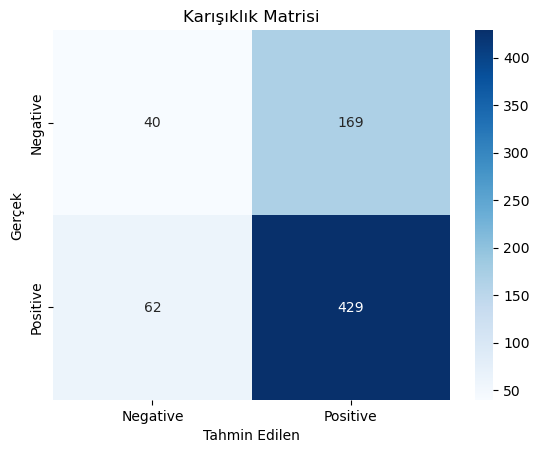

Logistic Reg. Sınıflandırma Raporu:
Logistic Regression Doğruluk (Accuracy): 0.67
Logistic Regression Kesinlik (Precision): 0.72
Logistic Regression Duyarlılık (Recall): 0.87
Logistic Regression F1-Skoru: 0.79


In [95]:
# Modeli Değerlendirme
# Modelin performansını test verisi üzerinde ölçün ve istenilen metrikleri hesaplayın.

# Test seti tahminleri
y_pred = log_model.predict(X_test_scaled)

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()


# Sınıflandırma Raporu

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # average='binary' -> ikili sınıflandırma
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')


print("Logistic Reg. Sınıflandırma Raporu:")

print(f"Logistic Regression Doğruluk (Accuracy): {accuracy:.2f}")
print(f"Logistic Regression Kesinlik (Precision): {precision:.2f}")
print(f"Logistic Regression Duyarlılık (Recall): {recall:.2f}")
print(f"Logistic Regression F1-Skoru: {f1:.2f}")


In [96]:
score_log = log_model.score(X_test_scaled, y_test)   
print("Logistic Regression score değeri:", score_log)

 # burada score X_test_scaled ve y_test ile yapılmalıdır. çünkü train'i ezberlemiş(overfitting) olabilir. O yüzden test'ler ile test edilmelidir.

Logistic Regression score değeri: 0.67


**model score sonucunu yorumlama:**<br>
- %67 oranında başarılı buluyormuş. Çok iyi bir skor değil daha yüksek olması lazım.


# 4.2. KNN Sınıflandırma

**Görev 4.2.1**
- Çapraz doğrulama (Cross Validation) kullanarak en iyi "k" değerini bulmak için hiperparametre optimizasyonu yapın.

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# y tahmin etmek istediğimiz yani bağımlı değişken, x = feature'lar yani bağımsız değişkenler

y_knn = df["risk"]

X_knn = df.drop(columns="risk")

In [99]:
y_knn

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: risk, Length: 1000, dtype: int64

In [100]:
X_knn

,age,job,saving_accounts,checking_account,credit_amount,duration,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,housing_own,housing_rent,sex_male,monthly_credit
0,67,2,1,1,1169,6,0,0,0,0,1,0,0,1,0,1,194.833333
1,22,2,1,2,5951,48,0,0,0,0,1,0,0,1,0,0,123.979167
2,49,1,1,1,2096,12,0,0,1,0,0,0,0,1,0,1,174.666667
3,45,2,1,1,7882,42,0,0,0,1,0,0,0,0,0,1,187.666667
4,53,2,1,1,4870,24,1,0,0,0,0,0,0,0,0,1,202.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,1,1736,12,0,0,0,1,0,0,0,1,0,0,144.666667
996,40,3,1,1,3857,30,1,0,0,0,0,0,0,1,0,1,128.566667
997,38,2,1,1,804,12,0,0,0,0,1,0,0,1,0,1,67.000000
998,23,2,1,1,1845,45,0,0,0,0,1,0,0,0,0,1,41.000000


In [101]:
# Veri setimizi train ve test olarak ayıralım

X_test_knn, X_train_knn, y_test_knn, y_train_knn = train_test_split(X_knn, y_knn, train_size=0.70, random_state=42)   

### Scaling yapalım

In [102]:
# Standard Scaling için gerekli sınıfı import edelim.

from sklearn.preprocessing import StandardScaler

In [103]:
# Standard scaler nesnesi yaratalım.

scaler_knn = StandardScaler()  

In [104]:
# bağımsız değişkenlerimizi scale edelim.

X_train_scaled_knn = scaler_knn.fit_transform(X_train)
X_test_scaled_knn = scaler_knn.transform(X_test)

In [105]:
X_train_scaled_knn

array([[-1.00130392,  0.27071586, -0.4433478 , ..., -0.4843221 ,
        -1.55212464,  0.06369413],
       [-0.05748703, -1.29110641,  0.81141013, ..., -0.4843221 ,
         0.64427815,  0.44455019],
       [-0.31489164,  0.27071586,  0.81141013, ..., -0.4843221 ,
         0.64427815, -0.399174  ],
       ...,
       [-1.34451007,  0.27071586, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.11681244],
       [-0.05748703,  1.83253813, -0.4433478 , ...,  2.0647416 ,
         0.64427815,  0.15458751],
       [-1.34451007,  0.27071586, -0.4433478 , ...,  2.0647416 ,
        -1.55212464, -0.34180556]])

In [106]:
X_test_scaled_knn

array([[ 2.08755137,  0.27071586, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.46950435],
       [ 0.28571911,  1.83253813, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.05280302],
       [ 1.83014676,  0.27071586,  2.06616806, ...,  2.0647416 ,
        -1.55212464, -0.26172977],
       ...,
       [-0.74389932,  0.27071586,  2.06616806, ..., -0.4843221 ,
         0.64427815,  0.43590892],
       [-0.91550239,  0.27071586, -0.4433478 , ..., -0.4843221 ,
         0.64427815, -0.24483128],
       [-1.00130392,  0.27071586, -0.4433478 , ..., -0.4843221 ,
        -1.55212464, -0.06240443]])

**Görev 4.2.2**
- En iyi "k" değeri ile modeli eğitin ve değerlendirin.

In [107]:
# KNN için gerekli sınıfı import edelim

from sklearn.neighbors import KNeighborsClassifier

In [108]:
# KNN modelini çağıralım. 

knn_1 = KNeighborsClassifier(n_neighbors= 3)

In [109]:
knn_1

KNeighborsClassifier(n_neighbors=3)

In [110]:
# Modeli eğitiyoruz(öğrenme tamamlanacak) 

knn_1.fit(X_train_scaled_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [111]:
# Test verisi üzerinde tahmin yap --  PREDICT : tahmin etmek

y_pred_knn_final = knn_1.predict(X_test_scaled_knn)

In [112]:
# Eğitilen modelin sonuçlarını hızlıca değerlendirelim

print(classification_report(y_test_knn, y_pred_knn_final))
holdout = classification_report(y_test_knn, y_pred_knn_final)

              precision    recall  f1-score   support

           0       0.38      0.26      0.31       209
           1       0.72      0.82      0.77       491

    accuracy                           0.65       700
   macro avg       0.55      0.54      0.54       700
weighted avg       0.62      0.65      0.63       700



In [113]:
# Modelimizin en iyi k değerini bulabilmesi için cross validation'ı import edelim

from sklearn.model_selection import cross_validate

In [114]:
# KNN modelini çağıralım. 

knn_cv = KNeighborsClassifier()

In [115]:
knn_cv

KNeighborsClassifier()

In [116]:
# cross validation uygulayalım

scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

cv_results = cross_validate(knn_cv, X_train_scaled_knn, y_train_knn, cv=5, scoring=scoring)

In [117]:
cv_results

{'fit_time': array([0.00110555, 0.        , 0.00100231, 0.        , 0.        ]),
 'score_time': array([0.02704811, 0.03518152, 0.02763462, 0.03272462, 0.01662445]),
 'test_accuracy': array([0.6       , 0.65      , 0.61666667, 0.61666667, 0.61666667]),
 'test_precision_macro': array([0.40161725, 0.51960784, 0.48330241, 0.41105121, 0.48330241]),
 'test_recall_macro': array([0.45314506, 0.51190476, 0.48809524, 0.45634921, 0.48809524]),
 'test_f1_macro': array([0.41080196, 0.49820789, 0.47707465, 0.41894737, 0.47707465])}

In [118]:
print("Accuracy: ", cv_results["test_accuracy"].mean())
print("Precision: ", cv_results["test_precision_macro"].mean())
print("Recall: ", cv_results["test_recall_macro"].mean())
print("F1 Score: ", cv_results["test_f1_macro"].mean())

Accuracy:  0.62
Precision:  0.45977622609935914
Recall:  0.4795179004421623
F1 Score:  0.4564213033392101


In [119]:
print(holdout)

              precision    recall  f1-score   support

           0       0.38      0.26      0.31       209
           1       0.72      0.82      0.77       491

    accuracy                           0.65       700
   macro avg       0.55      0.54      0.54       700
weighted avg       0.62      0.65      0.63       700



In [120]:
knn_cv.n_neighbors

5

In [121]:
# bir aralık belirleyelim 

k_values = np.arange(1,21)

In [122]:
# aralıktaki en yüksek değere sahip olan k değerini bulalım

mean_test_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors= k)
    cv_results = cross_validate(knn, X_train_scaled_knn, y_train_knn, cv=5, scoring = "accuracy")
    mean_test_score.append(cv_results["test_score"].mean())

In [123]:
mean_test_score

[0.5433333333333333,
 0.5266666666666666,
 0.6399999999999999,
 0.5800000000000001,
 0.62,
 0.6066666666666667,
 0.6633333333333333,
 0.6433333333333333,
 0.6566666666666666,
 0.6466666666666667,
 0.6599999999999999,
 0.6733333333333332,
 0.6699999999999999,
 0.6566666666666666,
 0.6766666666666667,
 0.6733333333333332,
 0.6766666666666665,
 0.6733333333333332,
 0.6933333333333334,
 0.6900000000000001]

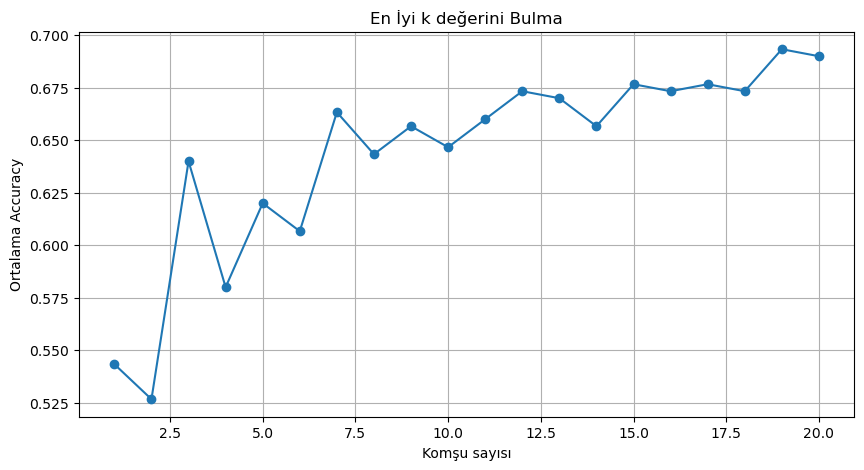

In [124]:
# en iyi k değerini net görebilmek için grafik oluşturalım

plt.figure(figsize=(10,5))
plt.plot(k_values, mean_test_score, marker="o")
plt.xlabel("Komşu sayısı")
plt.ylabel("Ortalama Accuracy")
plt.title("En İyi k değerini Bulma")
plt.grid()
plt.show()

In [125]:
# En iyi k sayısına göre modelimizi yeniden kuralım

knn_final = KNeighborsClassifier(n_neighbors= 19)

In [126]:
# Modeli en iyi k sayısına göre eğitelim

knn_final.fit(X_train_scaled_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=19)

In [127]:
# Test verisi üzerinde tahmin yap  --  PREDICT : tahmin etmek

y_pred_knn_final= knn_final.predict(X_test_scaled_knn)

In [128]:
# Doğruluk (Accuracy) : Doğru tahmin edilen örneklerin toplam örnek sayısına oranı.

accuracy_knn = accuracy_score(y_test_knn, y_pred_knn_final)
print("KNN Doğruluk (Accuracy):", accuracy_knn)

KNN Doğruluk (Accuracy): 0.7042857142857143


In [129]:
# Kesinlik (Precision) : Pozitif sınıf tahminlerinin ne kadarının doğru olduğunu gösterir.

precision_knn = precision_score(y_test_knn, y_pred_knn_final)
print("KNN Kesinlik (Precision):", precision_knn)

KNN Kesinlik (Precision): 0.7057971014492753


In [130]:
# Duyarlılık (Recall) : Gerçek pozitif sınıfların ne kadarının doğru tahmin edildiğini gösterir.

recall_knn= recall_score(y_test_knn, y_pred_knn_final)
print("KNN Duyarlılık (Recall):", recall_knn)

KNN Duyarlılık (Recall): 0.9918533604887984


In [131]:
# F1-Skoru : Precision ve Recall’un harmonik ortalamasıdır.

f1_knn = f1_score(y_test_knn, y_pred_knn_final)
print("KNN F1-Skoru:", f1_knn)

KNN F1-Skoru: 0.8247248094834886


In [132]:
# Detaylı Rapor ve Karışıklık Matrisi : Karışıklık matrisi ve tüm metriklerin özet raporu:

karisiklik_matrisi_knn_final = confusion_matrix(y_test_knn, y_pred_knn_final)
siniflandirma_raporu_knn_final = classification_report(y_test_knn, y_pred_knn_final)

In [133]:
print("KNN Karışıklık Matrisi:\n", karisiklik_matrisi_knn_final)
print()
print("KNN Sınıflandırma Raporu:\n", siniflandirma_raporu_knn_final)

KNN Karışıklık Matrisi:
 [[  6 203]
 [  4 487]]

KNN Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.60      0.03      0.05       209
           1       0.71      0.99      0.82       491

    accuracy                           0.70       700
   macro avg       0.65      0.51      0.44       700
weighted avg       0.67      0.70      0.59       700



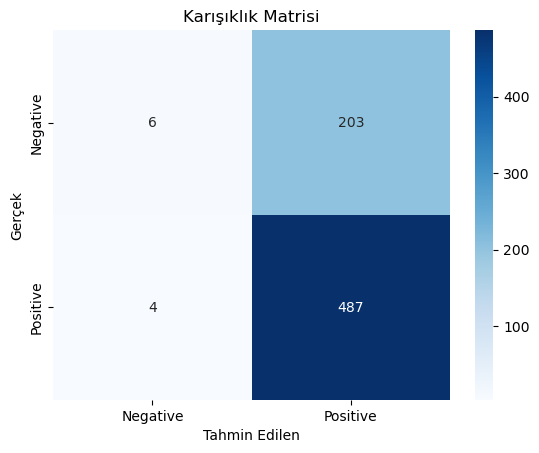

KNN Sınıflandırma Raporu: 
KNN Doğruluk (Accuracy): 0.70
KNN Kesinlik (Precision): 0.71
KNN Duyarlılık (Recall): 0.99
KNN F1-Skoru: 0.82


In [134]:
# Modeli Değerlendirme
# Modelin performansını test verisi üzerinde ölçün ve istenilen metrikleri hesaplayın.

# Test seti tahminleri
y_pred_knn = knn_final.predict(X_test_scaled_knn)

# Karışıklık matrisi
cm = confusion_matrix(y_test_knn, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma Raporu

# Performans metrikleri
accuracy = accuracy_score(y_test_knn, y_pred_knn)
precision = precision_score(y_test_knn, y_pred_knn, average='binary')  # average='binary' -> ikili sınıflandırma
recall = recall_score(y_test_knn, y_pred_knn, average='binary')
f1 = f1_score(y_test_knn, y_pred_knn, average='binary')

print("KNN Sınıflandırma Raporu: ")
print(f"KNN Doğruluk (Accuracy): {accuracy:.2f}")
print(f"KNN Kesinlik (Precision): {precision:.2f}")
print(f"KNN Duyarlılık (Recall): {recall:.2f}")
print(f"KNN F1-Skoru: {f1:.2f}")


In [135]:
knn_score = knn_final.score(X_test_scaled_knn, y_test_knn)  
print("KNN score değeri:", knn_score)

KNN score değeri: 0.7042857142857143


**model score sonucunu yorumlama:**<br>
- %70 oranında başarılı buluyormuş. Çok iyi bir skor değil daha yüksek olması lazım.

**<span style="font-size:32px; color:black;">5. Model Değerlendirmesi</span>**

# 5.1.Her iki modeli aşağıdaki metriklerle değerlendirin

**Görev 5.1.1**
- Karışıklık matrisi.

In [136]:
# Logistic Regression confusion matrix, KNN confusion matrix Sonuçları 

print("Logistic Reg. Karışıklık Matrisi:\n", karisiklik_matrisi_log)
print('----------------------------------------------------')
print("KNN Karışıklık Matrisi:\n", karisiklik_matrisi_knn_final)


Logistic Reg. Karışıklık Matrisi:
 [[ 40 169]
 [ 62 429]]
----------------------------------------------------
KNN Karışıklık Matrisi:
 [[  6 203]
 [  4 487]]


**Yorumlayalım:**

Logistic Regression Karışıklık Matrisi:
- True Negatives (TN): 40 
- False Positives (FP): 169
- False Negatives (FN): 62
- True Positives (TP): 429


KNN Karışıklık Matrisi:
- True Negatives (TN): 6
- False Positives (FP): 203
- False Negatives (FN): 4
- True Positives (TP): 487


**Pozitif ve Negatif Sınıflar Üzerindeki Performans**

**True Negatives (Doğru negatifler):**  (Negatif sınıfı doğru tahmin etme)
- Logistic Regression: 40
- KNN: 6

Logistic Regression, negatif sınıfı doğru tahmin etme konusunda KNN'den çok daha iyi. Bu, yanlış pozitiflerin azaltılmasını gerektiren durumlarda Logistic Regression'ı daha uygun hale getirir.

**False Positives (Yanlış pozitifler):**  (Yanlış pozitif tahmin etme)
- Logistic Regression: 169
- KNN: 203

KNN daha fazla yanlış pozitif tahminde bulunmuş. Bu, pozitif sınıf olarak yanlış tahmin edilen örneklerin Logistic Regression'da daha az olduğunu gösterir.

**False Negatives (Yanlış negatifler):**  (Yanlış negatif tahmin etme)
- Logistic Regression: 62 
- KNN: 4

KNN'nin yanlış negatif sayısı çok düşüktür. Bu, pozitif sınıfları kaçırma ihtimalinin Logistic Regression'a göre çok daha az olduğunu gösterir. Bu metrik özellikle Recall (Duyarlılık) açısından KNN'nin üstünlüğünü açıklar.

**True Positives (Doğru pozitifler):**   (Pozitif sınıfı doğru tahmin etme)
- Logistic Regression: 429
- KNN: 487

KNN, doğru pozitif tahminlerde de üstünlük sağlamaktadır. Bu, pozitif sınıfı doğru şekilde yakalama kapasitesinin daha yüksek olduğunu gösterir.

**Görev 5.1.2**
- Sınıflandırma raporu (Kesinlik, Duyarlılık, F1-Skoru)

In [137]:
# Logistic Regression,KNN classification report Sonuçlar

print("Logistic Reg. Sınıflandırma Raporu:\n", siniflandirma_raporu_log)
print('----------------------------------------------------')
print("KNN Sınıflandırma Raporu:\n", siniflandirma_raporu_knn_final)

Logistic Reg. Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.39      0.19      0.26       209
           1       0.72      0.87      0.79       491

    accuracy                           0.67       700
   macro avg       0.55      0.53      0.52       700
weighted avg       0.62      0.67      0.63       700

----------------------------------------------------
KNN Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.60      0.03      0.05       209
           1       0.71      0.99      0.82       491

    accuracy                           0.70       700
   macro avg       0.65      0.51      0.44       700
weighted avg       0.67      0.70      0.59       700



# 5.2.Lojistik Regresyon ve KNN sonuçlarını karşılaştırın. Hangi model daha iyi performans gösteriyor? Neden?

### Logistic Regresyon & KNN Sonuçları (Doğruluk (Accuracy), Kesinlik (Precision), Duyarlılık (Recall) ve F1-Skoru)

In [138]:
# Doğruluk (Accuracy) : Doğru tahmin edilen örneklerin toplam örnek sayısına oranı.

print("Logistic Regression Doğruluk (Accuracy):", accuracy_log)
print("Logistic Regression Kesinlik (Precision):", precision_log)
print("Logistic Regression Duyarlılık (Recall):", recall_log)
print("Logistic Regression F1-Skoru:", f1_log)

print("--------------------------------------------------------------")

print("KNN Doğruluk (Accuracy):", accuracy_knn)
print("KNN Kesinlik (Precision):", precision_knn)
print("KNN Duyarlılık (Recall):", recall_knn)
print("KNN F1-Skoru:", f1_knn)

Logistic Regression Doğruluk (Accuracy): 0.67
Logistic Regression Kesinlik (Precision): 0.717391304347826
Logistic Regression Duyarlılık (Recall): 0.8737270875763747
Logistic Regression F1-Skoru: 0.7878787878787877
--------------------------------------------------------------
KNN Doğruluk (Accuracy): 0.7042857142857143
KNN Kesinlik (Precision): 0.7057971014492753
KNN Duyarlılık (Recall): 0.9918533604887984
KNN F1-Skoru: 0.8247248094834886


- **Accuracy(Doğruluk) Yorum:** KNN, doğruluk açısından daha iyi performans göstermektedir. Bu, genel olarak daha fazla doğru tahminde bulunduğunu ifade eder.

- **Precision(Kesinlik) Yorum:** Precision, pozitif tahminlerin doğruluğunu ölçer. Logistic Regression bu açıdan KNN'den biraz daha iyi, yani yaptığı pozitif tahminler arasında hatalı olanların oranı daha düşüktür.

- **Recall(Duyarlılık) Yorum:** Duyarlılık, gerçek pozitifleri doğru tahmin etme oranını ölçer. Burada, KNN çok daha iyi bir performans göstermektedir, yani pozitif sınıfın neredeyse tamamını doğru tahmin edebilmiştir. Logistic Regression da iyi bir performans göstermesine rağmen, KNN bu metrikte bariz bir üstünlük sağlamıştır.

- **F1-Skoru Yorum:** F1-Skoru, kesinlik ve duyarlılığı birleştirerek dengeli bir performans ölçütü sağlar. KNN, F1-Skoru açısından daha iyi bir sonuç vermektedir. Bu, hem kesinlik hem de duyarlılık arasında daha iyi bir denge sağladığını gösterir.

### Genel Değerlendirme
- Accuracy ve F1-Skoru metriklerinde KNN öne çıkıyor.
- Recall açısından KNN çok yüksek bir performans sergiliyor, bu da pozitif sınıfın neredeyse tamamını doğru tahmin ettiğini gösteriyor.
- Precision (Kesinlik) açısından ise Logistic Regression biraz daha iyi, bu da KNN'nin daha fazla yanlış pozitif tahmin yaptığını gösterebilir.
<br>


## ÖNEMLİ NOT: 
- Eğerki bir veri setinde dengesizlik varsa değerlendirmelerin F1 Score'a göre yapılması daha sağlıklı olacaktır.
- F1-Score, özellikle dengesiz veri setlerinde modelin azınlık sınıfına ne kadar duyarlı ve doğru olduğunu ölçerken daha anlamlı bir metrik sunar. Accuracy, dengesiz veri setlerinde yanıltıcı olabileceğinden, F1-Score genellikle daha doğru ve güvenilir bir değerlendirme sağlar.

**Logistic Regression F1-Skoru:** 0.7878787878787877

**KNN F1-Skoru:** 0.8247248094834886


**Genel performans açısından bakıldığında, KNN daha iyi sonuç vermiştir, çünkü hem doğruluk hem de F1-Skoru daha yüksektir ve pozitif sınıfı yakalama konusunda üstünlük sağlamıştır.**
